<a href="https://colab.research.google.com/github/thalestmm/ds_projects/blob/main/_01_Airbnb_Exploratory_Data_Analysis_Madrid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

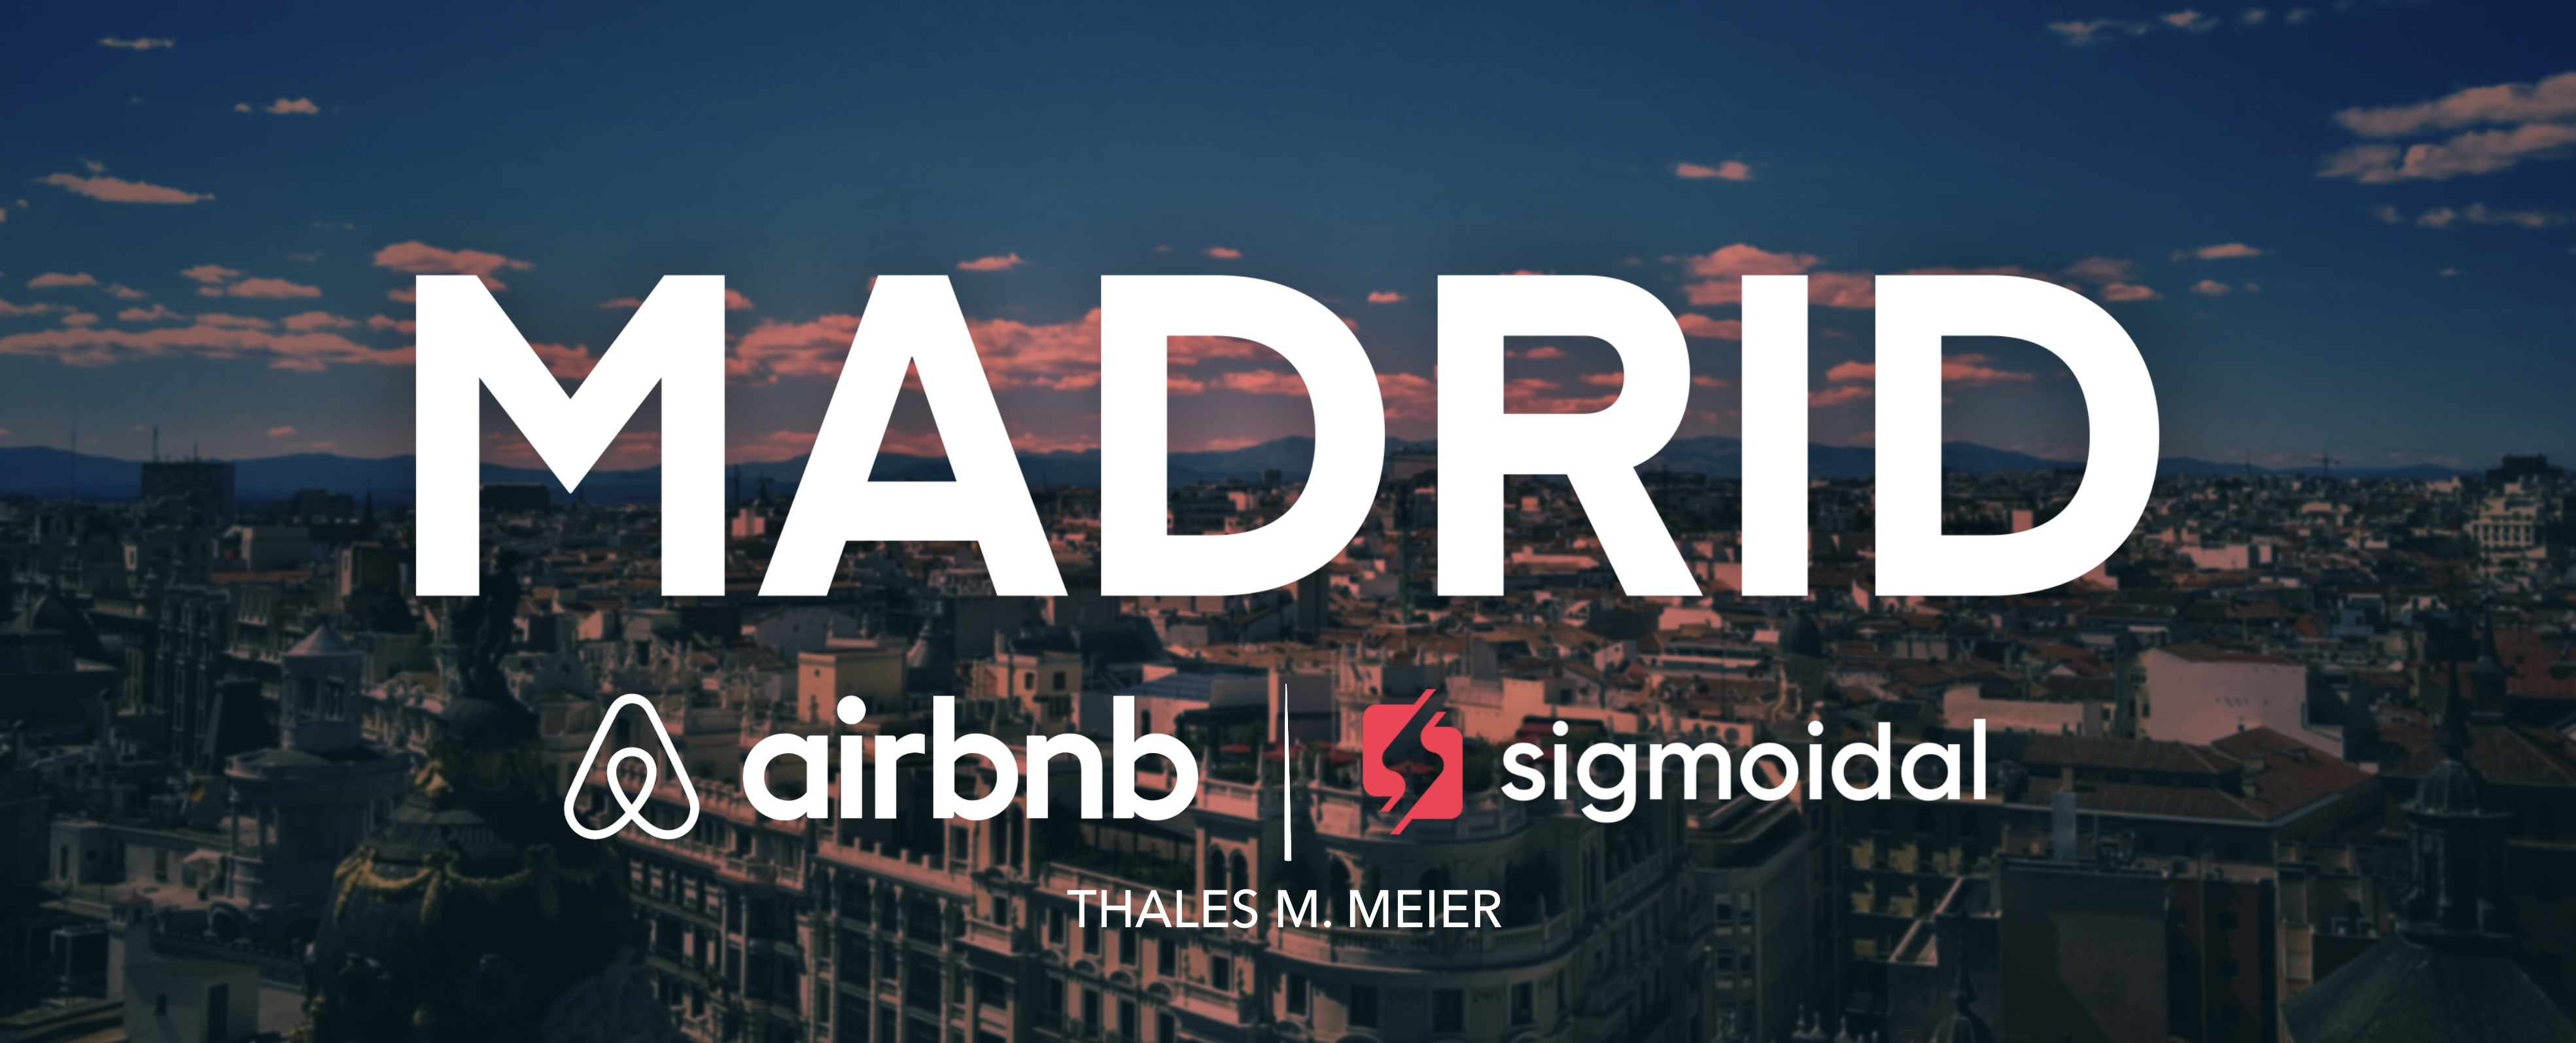


---
# **Airbnb Exploratory Data Analysis - *Madrid***

[Airbnb](https://www.airbnb.com.br/) is already considered to be the **largest company on the lodging sector**. Wanna know a fun fact? Airbnb doensn't actually own a single rental property!

By connecting travelers to people willing to rent their house, apartment, or even a room in a practical and simple fashion, Airbnb completely revolutionized the way people travel and go on about living life, in general.

At the end of 2018, Airbnb, that was created 10 years prior, had already lodged more than 300 million people throughout the world, challenging the old traditional system.

One of the Startup's many iniciatives is to deliver, free-of-charge, data from the company, regardind the main cities of the world, via the [Inside Airbnb](http://insideairbnb.com/get-the-data.html) website. There, we can find a whole lot of files ready to be used and deployed as *Data Science* projects and solutions.

**In this *notebook*, we'll take a look at the data from Madrid - Spain, and find out which insights we can extract from it.**

## Accessing our Data


First of all, we must import all the necessary libraries to our analysis

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Now, we'll import the dataset. As mentioned earlier, we'll be using the data from the *Inside Airbnb* page, for the city of Madrid. The latest data are from the 07th of November, 2021.

In [ ]:
url = "http://data.insideairbnb.com/spain/comunidad-de-madrid/madrid/2021-11-07/visualisations/listings.csv"

df_raw = pd.read_csv(url,index_col="id")

## Initial Analysis


**Data Dictionary**

* `id` - An unique identifying number, given to each property on Airbnb
* `name` - The name of each property, as displayed on the app
* `host_id` - Similar to the `id`, but this time regardind the owner, or host
* `host_name` - The owner's first name
* `neighbourhood_group` - The name of divisions given to each location, bigger than the neighbourhoods themselves
* `neighbourhood` - The name of each neighbourhood
* `latitude` - The latitude of the property's coordinates
* `longitude` - The longitude of the property's coordinates
* `room_type` - The type of the property announced, like a single private room, entire home etc
* `price` - The price for staying one night on each property, here displayed in Euros (EUR)
* `minimum_nights` - The number of minimum nights required to stay on each property
* `number_of_reviews` - The amount of reviews made ever since the property was first rented
* `last_review` - The date of the last review posted
* `reviews_per_month` - Average rate of reviews posted, per month     
* `calculated_host_listings_count` - The number of listings the host has in the current set, in the same city/region
* `availability_365` - The amount of days the property has been availabl, on an entire year basis
* `number_of_reviews_ltm` - The number of reviews made in the past 12 months
* `license` - The license/permit registration number  

Before any proper analysis, we'll take a look at the first and last 5 entries of our dataset, and also find the total number of rows and columns.

In [ ]:
print(f"This dataset has {df_raw.shape[0]} entries (rows) and {df_raw.shape[1]} attributes (columns)")
print("\nThese are the first 5 entries:")

df_raw.head()

This dataset has 17634 entries (rows) and 17 attributes (columns)

These are the first 5 entries:


,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
id,,,,,,,,,,,,,,,,,
6369,"Rooftop terrace room , ensuite bathroom",13660,Simon,Chamartín,Hispanoamérica,40.45724,-3.67688,Private room,60,1,80,2019-05-14,1.17,1,155,2,NaN
21853,Bright and airy room,83531,Abdel,Latina,Cármenes,40.40381,-3.74130,Private room,31,4,33,2018-05-29,0.38,2,99,0,NaN
23001,Apartmento Arganzuela- Madrid Rio,82175,Jesus,Arganzuela,Legazpi,40.38840,-3.69511,Entire home/apt,50,15,0,NaN,NaN,6,279,0,NaN
24805,Gran Via Studio Madrid,346366726,A,Centro,Universidad,40.42183,-3.70529,Entire home/apt,92,5,12,2020-03-01,0.47,1,148,2,NaN
26825,Single Room whith private Bathroom,114340,Agustina,Arganzuela,Legazpi,40.38975,-3.69018,Private room,29,2,152,2018-05-15,1.65,1,355,3,NaN


In [ ]:
print("Now the last 5 entries:")

df_raw.tail()

Now the last 5 entries:


,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
id,,,,,,,,,,,,,,,,,
53188720,Lovely apartment in the center of Madrid,15163971,Carlota,Centro,Cortes,40.414086,-3.702314,Entire home/apt,111,2,0,NaN,NaN,7,338,0,NaN
53189416,Cozy apartment centrally located,15163971,Carlota,Centro,Cortes,40.414066,-3.700412,Entire home/apt,109,2,0,NaN,NaN,7,155,0,NaN
53195801,"RiNa MADRID 1 independiente, calidades y ubica...",260344662,Pedro,Moncloa - Aravaca,Valdezarza,40.458357,-3.711475,Entire home/apt,80,2,0,NaN,NaN,2,84,0,VT-13319
53202120,Fabuloso Apartamento para 6 en Madrid.,6288128,Javier,Chamberí,Rios Rosas,40.446588,-3.700744,Entire home/apt,103,2,0,NaN,NaN,11,345,0,NaN
53203303,Goldi 5 min close to the center,22089497,Jule,Centro,Palacio,40.410169,-3.709948,Entire home/apt,82,1,0,NaN,NaN,18,90,0,NaN


As we've seen, we'll be working with a total of **17634 entries**, filling **17 attributes**, which gives us almost **300000** pieces of data to work our way through.

### What is the type of data we're dealing with?

In [ ]:
df_raw.dtypes

name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

In this dataset of ours, we have text values (`object`), integers (`int64`), and floating point numbers (`float64`).

### **Q2. What is the percentage of missing values?**

Missing values are not ideal to most kinds of analysis, but are a reality when dealing with data from the real world. So, that wouldn't be any different for us.

In [ ]:
print("All values are calculated on the basis of 1:\n")

df_raw.isnull().sum().sort_values(ascending=False) / df_raw.shape[0]

All values are calculated on the basis of 1:



license                           0.846320
reviews_per_month                 0.237723
last_review                       0.237723
host_name                         0.000397
name                              0.000170
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
number_of_reviews_ltm             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
availability_365                  0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

We can see that in this dataset we have 4 attributes with missing values: `license`, `reviews_per_month`, `last_review`, `host_name` and `name`.

For our upcoming analysis, though, none of these values will make a difference, but we could already imagine the reason for them to be missing: 

* `license` - The owner probably doesn't have a license number registered 
* `reviews_per_month` - The property probably wasn't reviewd in the past 12 months
* `last_review` - The property probably wasn't ever reviewed
* `host_name` - The host might've erased his name, or even his profile
* `name` - The property could not have been named just yet

Or, also, we could find out that tome of these data was lost while the set was being built. 

### **Q3. What is the kind of distribution for each attribute?** 

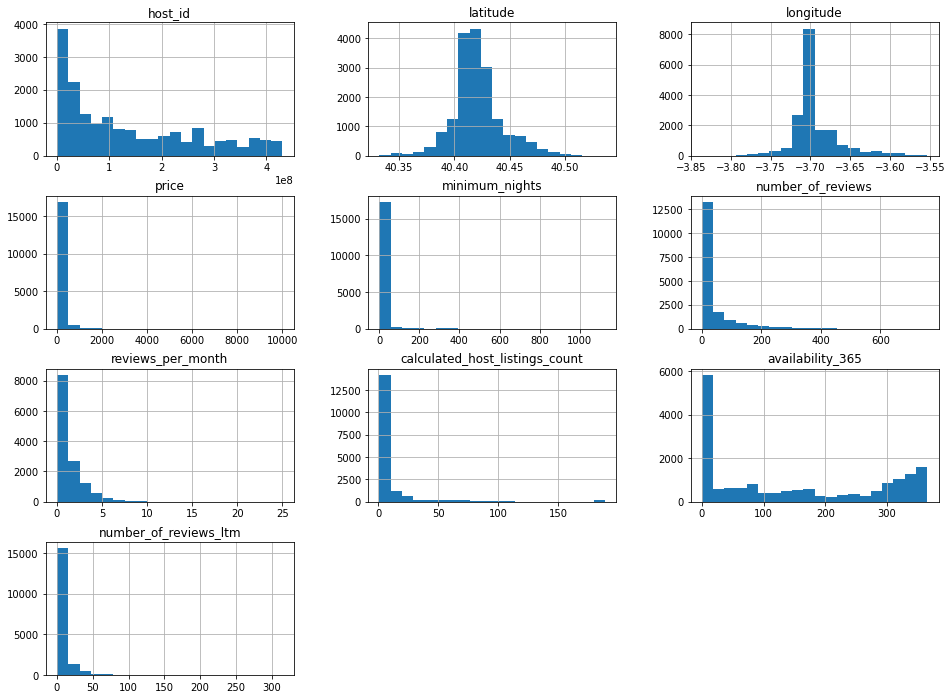

In [ ]:
df_raw.hist(bins=20,figsize=(16,12));

We can already see some values that seem odd, such as:  
* Values too large for the `minimum_nights`, larger even than a whole year
* `price` values way too large, up to 10000 EUR, which could be real, but definetely don`t represent the distribution we are aiming for

This values are *outliers*: pieces of data that are either way too high or way too low, given the most of our dataset, and for that reason should be treated so they won't interfere with the rest of our analysis.

We'll do this cleansing later on.

### **Q4. What is the mean price for a one-night renting?**

In [ ]:
df_raw.price.describe()

count    17634.000000
mean       134.161449
std        390.714237
min          0.000000
25%         40.000000
50%         70.000000
75%        114.000000
max       9999.000000
Name: price, dtype: float64

Here we can see that the *mean* price is **134.16 EUR**. Linear values such as the *mean* are heavily influenced by the outliers we mentioned earlier. A better measure is the *median*, which basically states up to what value 50% of the records lay within. That is, in our dataset, 50% of the properties cost up to **70.00 EUR** to rent.

This difference between the the *mean* and the *median* tells what we observed in the histograms earlier, the presence of *outliers* in our dataset.

### **Basic Data Cleansing**

First of all, let's plot both the `price` and `minimum_nights` attributes using *box plots*, so we can observe the *outliers*.

Keep in mind that the isolated circles are the *outliers*.

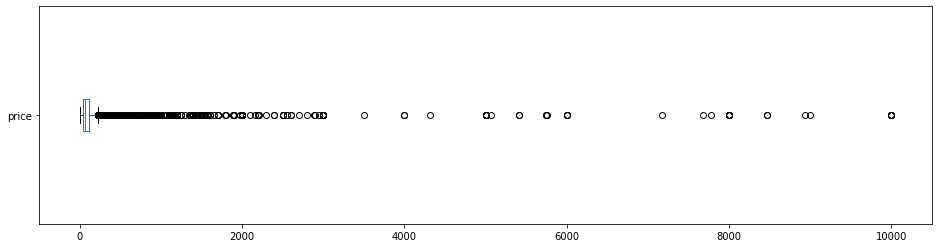

In [ ]:
df_raw.price.plot(kind="box", vert=False, figsize = (16,4));

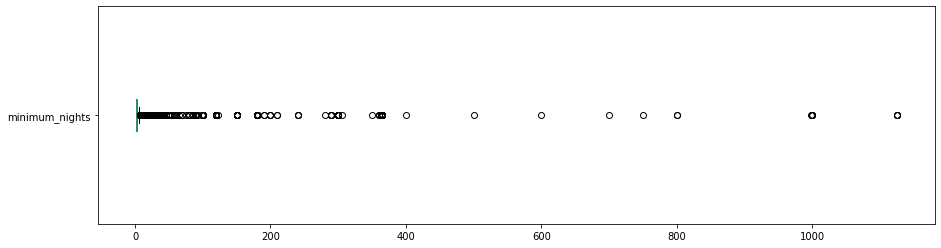

In [ ]:
df_raw.minimum_nights.plot(kind="box", vert=False, figsize = (15,4));

In order to remove the outliers, we could use a few methods, such as :  

* *IQR score* - using the value that ranges from the 1st quartile up to the 3rd quartile, the Inter Quartile Range, or IQR
* *Z-score* - instead of the IQR, we use a value based on the Standard Deviation and the mean
* *Box Plots* - the method we saw above, that applies the IQR Score rule
* *Scatter Plots* - another kind of plot, that shows *outliers* as values far away from the others

In addition to the methods above, we can use values that make sense to us, based on our previous experience in life, such as determining that the largest values for `minimum_nights` should be 30, or that the maximum `price` should be 500 EUR.

In this analysis of ours, we'll use the *IQR Score* method.

First of all, let's calculate the IQR:

In [ ]:
price_iqr = df_raw.price.quantile(q=0.75) - df_raw.price.quantile(q=0.25)

nights_iqr = df_raw.minimum_nights.quantile(q=0.75) - df_raw.minimum_nights.quantile(q=0.25)

print(f"The IQR for price is {price_iqr}, and for minimum_nights is {nights_iqr}")

The IQR for price is 74.0, and for minimum_nights is 2.0


The *IQR Score* method states that that values either larger than *3rd Q + 1.5 IQR* or lower than *1st Q - 1.5* IQR should be treated as *outliers*.

In [ ]:
price_low, price_high = (df_raw.price.quantile(q=0.25) - 1.5*price_iqr, 
                         df_raw.price.quantile(q=0.75) + 1.5*price_iqr)

nights_low, nights_high = (df_raw.minimum_nights.quantile(q=0.25) - 1.5*nights_iqr, 
                         df_raw.minimum_nights.quantile(q=0.75) + 1.5*nights_iqr)

print(f"For price, values smaller than {price_low} or larger than {price_high} are outliers\n")
print(f"For minimum_nights, values smaller than {nights_low} or larger than {nights_high} are outliers")

For price, values smaller than -71.0 or larger than 225.0 are outliers

For minimum_nights, values smaller than -2.0 or larger than 6.0 are outliers


Because we can't rent a property for free or less (<= 0 EUR), we'll use a range of 1 up to 225 EUR for `price`.

As for `minimum_nights`, we'll consider only the values from 1 to 6 nights.

Now, let's check the percentage of outliers:

In [ ]:
price_outliers = df_raw.price.loc[df_raw.price > 225].shape[0] / df_raw.shape[0]
nights_outliers = df_raw.minimum_nights.loc[df_raw.minimum_nights > 6].shape[0] / df_raw.shape[0]

print(f"The price attribute has {price_outliers:.3f} of outliers and minimum_nights has {nights_outliers:.3f}")

The price attribute has 0.093 of outliers and minimum_nights has 0.135


However, even though we've calculated the right ranges based on the IQR method, as data scientists we must evaluate each and every parameter we use in our analysis.

In this case, as the percentage of *ouliers* got pretty big and the ranges specified could be changes, we made the decision to change them.

So, for the `price`, going up to 300 EUR seems like a reasonable value, as well as bringing `minimum_nights` up to 15 days, given that a owner might want to rent a property for half a month at a time.

With these new ranges, we have:

In [ ]:
price_outliers = df_raw.price.loc[df_raw.price > 300].shape[0] / df_raw.shape[0]
nights_outliers = df_raw.minimum_nights.loc[df_raw.minimum_nights > 15].shape[0] / df_raw.shape[0]

print(f"The price attribute has {price_outliers:.3f} of outliers and minimum_nights has {nights_outliers:.3f}")

The price attribute has 0.063 of outliers and minimum_nights has 0.073


Now, let's delete these outliers, in order to clean our dataset.

In [ ]:
df_clean = df_raw.drop(df_raw.loc[df_raw.price > 300].index,axis=0)

df_clean = df_clean.drop(df_clean.loc[df_clean.minimum_nights > 15].index,axis=0)

print(f"The number of entries was cut from {df_raw.shape[0]} to {df_clean.shape[0]}, which corresponds to {df_clean.shape[0]/df_raw.shape[0]:.3f} of the original")

The number of entries was cut from 17634 to 15271, which corresponds to 0.866 of the original


We've erased approximately 14% of the original data, but we'd rather work with fewer, but high quality data, than with a whole lot of bad data.



### Boxplot of the cleansed columns

New mean: 80.7
New median: 67.0


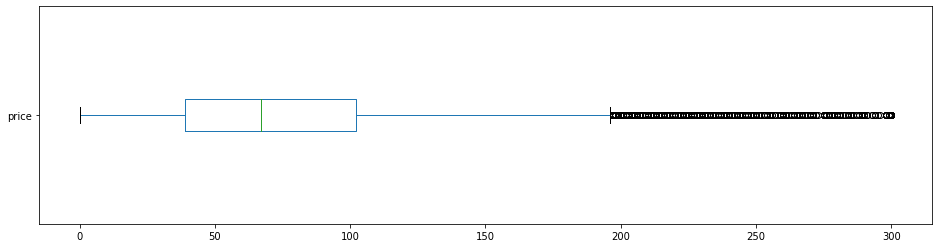

In [ ]:
df_clean.price.plot(kind="box",vert=False,figsize=(16,4));

print(f"New mean: {df_clean.price.mean():.1f}\nNew median: {df_clean.price.median():.1f}")

New mean: 2.5
New median: 2.0


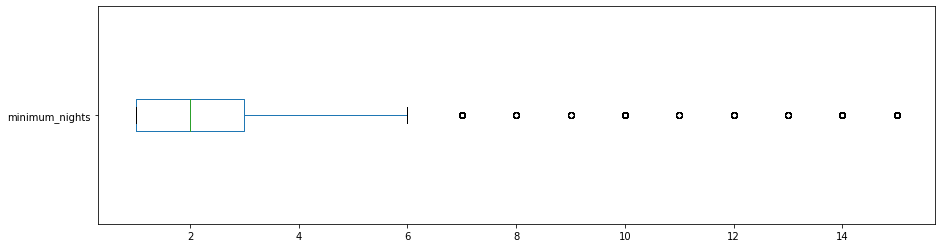

In [ ]:
df_clean.minimum_nights.plot(kind="box",vert=False,figsize=(15,4));

print(f"New mean: {df_clean.minimum_nights.mean():.1f}\nNew median: {df_clean.minimum_nights.median()}")

In these new plots we'll have *outliers* as well, but only because this is a new distribution, so it won't be a problem for us.

We can also observe that now the mean and the median for both attributes are much closer one to another, which indicates that now there aren't many more *outliers* influencing our distribution.

Finally, new histograms to show us the cleansed data:

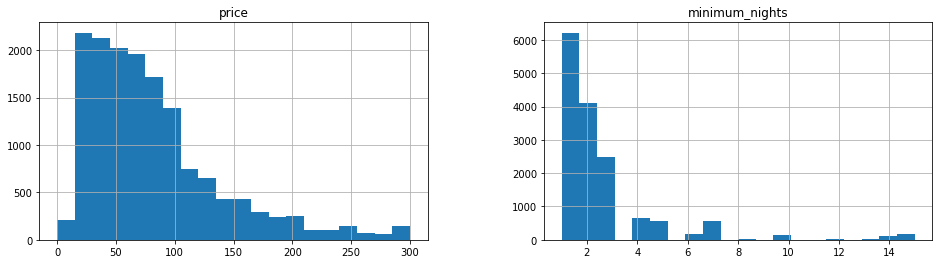

In [ ]:
df_clean[["price","minimum_nights"]].hist(bins=20,figsize=(16,4));

### **Q4. What is the correlation between all attributes?**

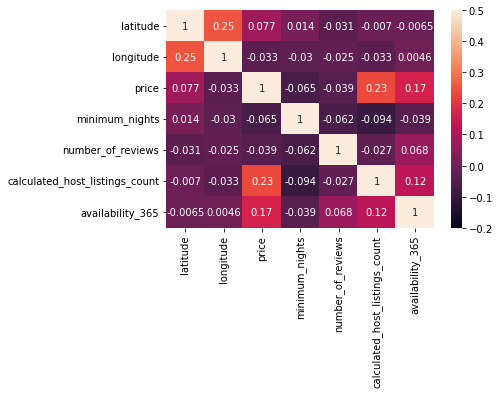

In [ ]:
num_values = ["latitude","longitude","price","minimum_nights","number_of_reviews","calculated_host_listings_count","availability_365"]
ax = sns.heatmap(df_clean[num_values].corr(),annot=True,vmin=-0.2,vmax=0.5)


As we can see, there aren't many relevant correlations within our dataset. The 2 most important that we should point out are the `calculated_host_listings_count` / `price`, which tells us that as the host posts more listings, so does the average price increase. And, also, the `availability_365` / `price`, which tells us that properties that stay more available throughout the year tend to have higher prices.

But, we must remember that both of these relations have weak correlations.

### **Q5. What is the most popular type of room?**

In [ ]:
df_clean.room_type.value_counts().sort_values(ascending=False)

Entire home/apt    9215
Private room       5732
Shared room         197
Hotel room          127
Name: room_type, dtype: int64

In [ ]:
df_clean.room_type.value_counts().sort_values(ascending=False) / df_clean.shape[0]

Entire home/apt    0.603431
Private room       0.375352
Shared room        0.012900
Hotel room         0.008316
Name: room_type, dtype: float64

As we can see, in Madrid, the most common type of property announced are Entire Homes or Apartments, with 60% of all listings, followed by Private Room, Shared Room and Hotel Room.

### **Q6. Which is the most expensive neighbourhood on the dataset?**



### Sorting by neighbourhood:

In [ ]:
df_clean.groupby("neighbourhood").price.mean().sort_values(ascending=False).head()

neighbourhood
Recoletos     113.994652
El Plantío    113.400000
Niño Jesús    106.888889
Almagro       105.702899
Castellana    105.455882
Name: price, dtype: float64

### Sorting by neighbourhood group:

In [ ]:
df_clean.groupby("neighbourhood_group").price.mean().sort_values(ascending=False).head()

neighbourhood_group
Salamanca    98.847095
Centro       90.421629
Chamberí     85.749160
Chamartín    82.435000
Retiro       81.403194
Name: price, dtype: float64

We can see, then, that the Recoletos neighbourhood is the most expensive to rent, as well as its larger group, Salamanca.

This fact actually represents the truth, as we can see in this post from [Telemadrid.es](https://www.telemadrid.es/noticias/madrid/barrios-caros-Madrid-comprar-vivienda-0-2325367449--20210323113642.html):

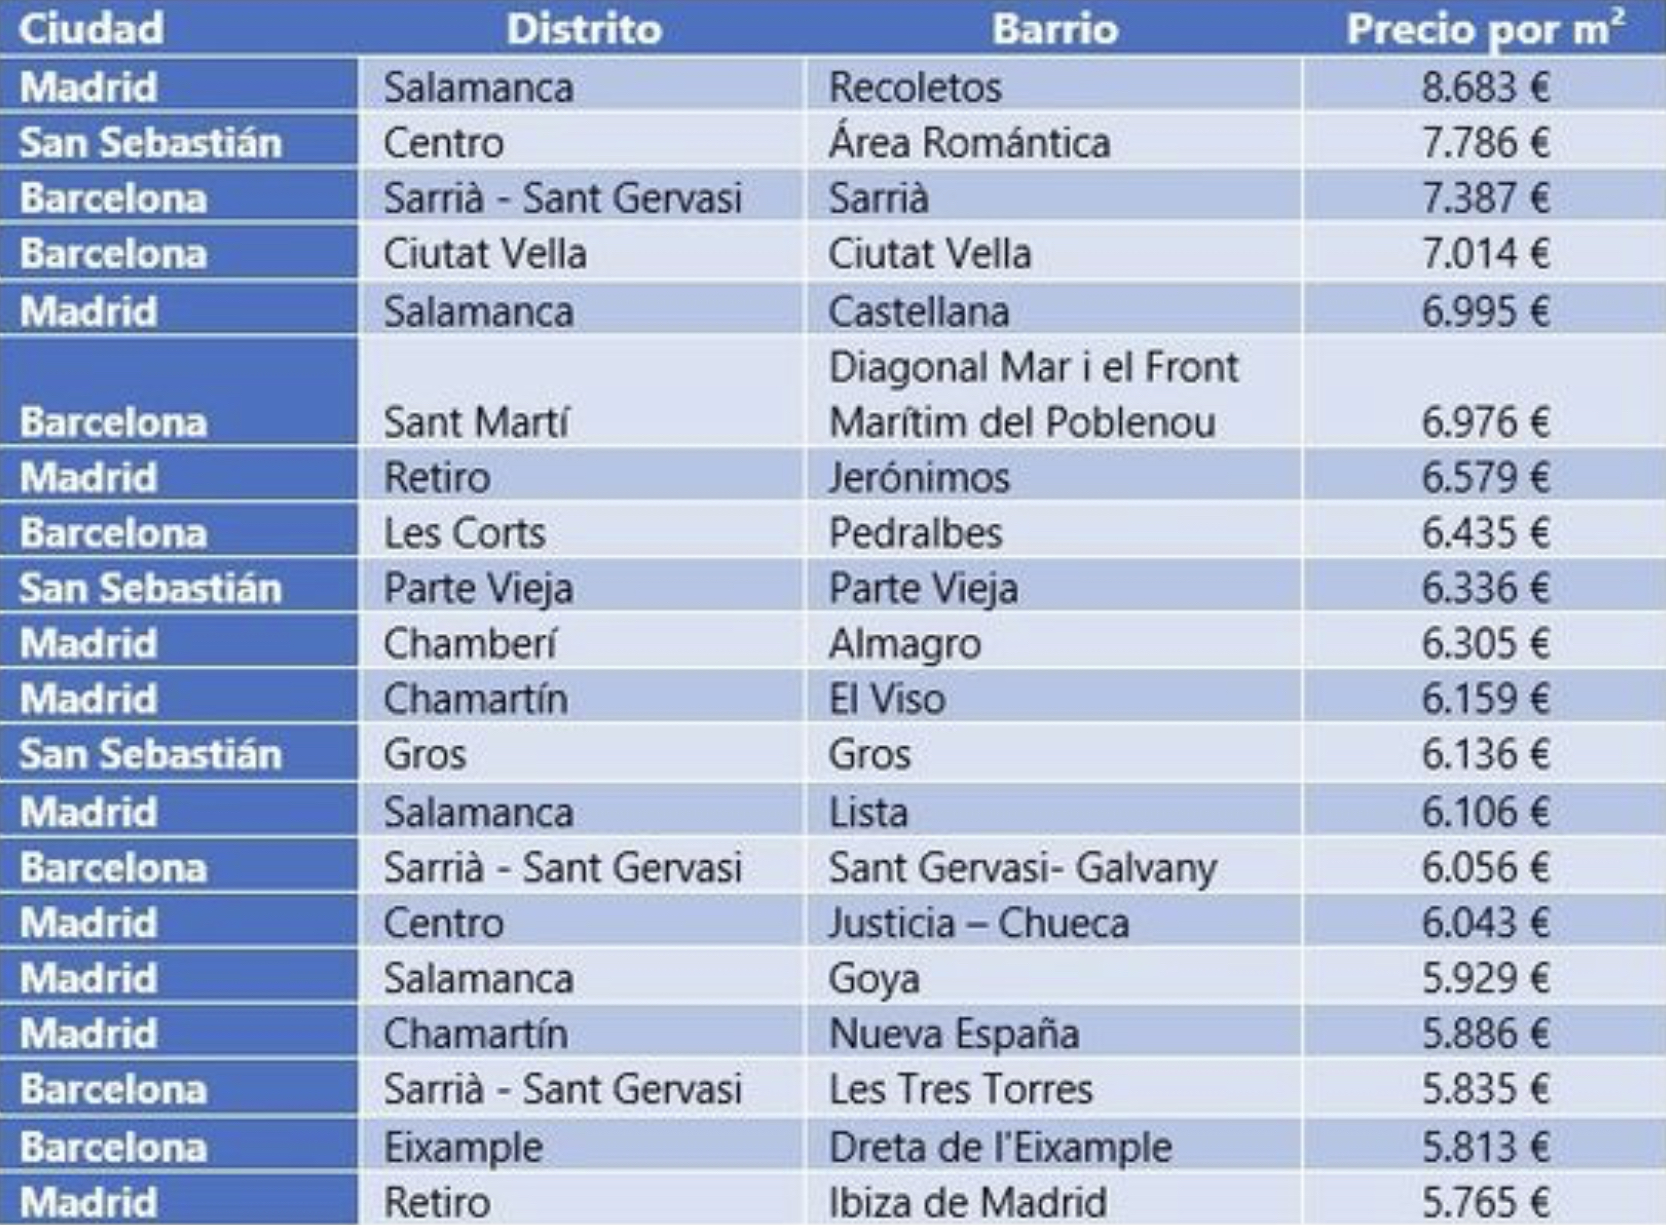

## **Ploting all the data onto a map:**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


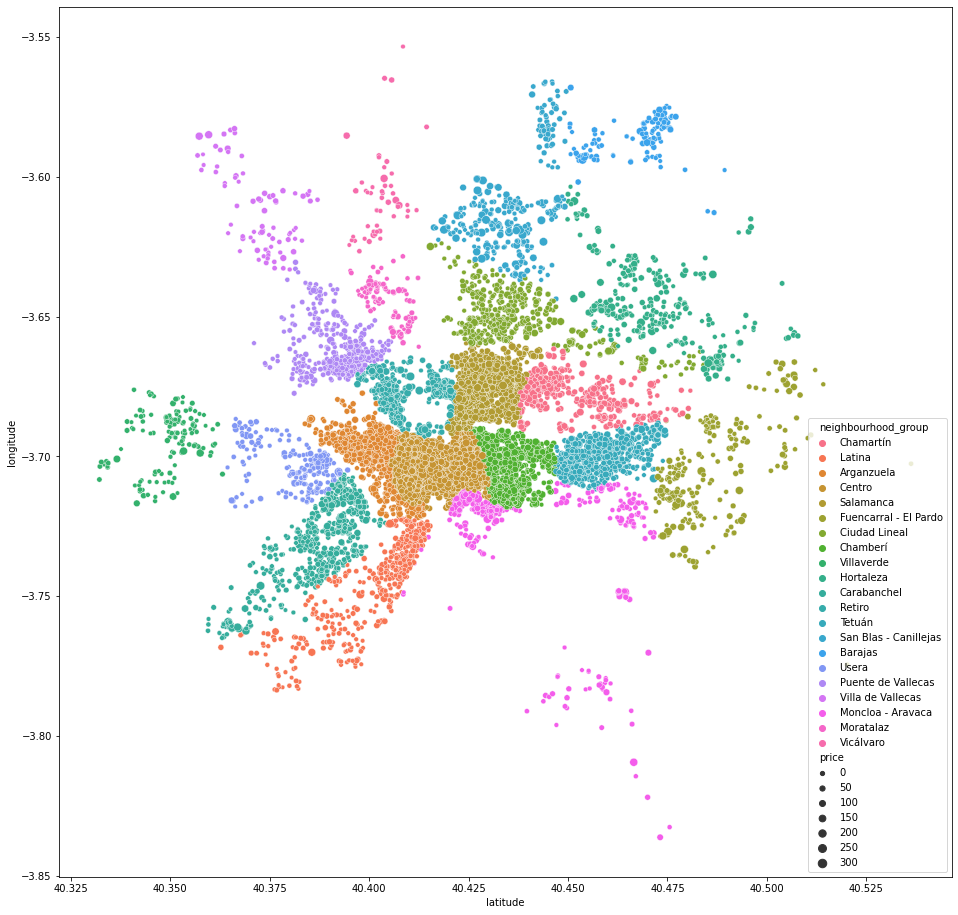

In [ ]:
x = df_clean.latitude
y = df_clean.longitude

fig_dims = (16,16);
fig,ax = plt.subplots(figsize=fig_dims);

plot = sns.scatterplot(x,y,ax=ax,hue=df_clean.neighbourhood_group,size=df_clean.price);

On this map, we can see each `neighbourhood_group` painted with an specific color, and the higher the `price`, larger the circle representing each listing.

## **Conclusions**


We've finally come to an end!

So, what can we learn from this exploratory analysis? Well, we first found that there were some missing values, but that they wouldn't interfere on our work. 

Then, we came across the many outliers on the dataset. Even though the *IQR Score* method recommended us slicing the data a bit more, we chose a more thoughtful approach, in a way that would optimize the percentage / interference tradeoff, and deleted roughly 14% of the original data.

After that, we made a quick correlation analysis, only to find out that there wasn't much of a strong correlation between any of the numerical attributes.

Coming to an end, we found out that the most expensive neighbourhood on the Airbnb dataset actually depicts a slice of reality, as Recoletos has both the highest renting fare and square meter price.

We finally plotted all the coordinates from the dataset utilizing a scatter plot, with all the neighbourhood groups being used as *hue*, and the prices controlling the sizes of each circle.

Thanks you so much for reading this notebook and supporting my work!

*Thales M. Meier*